<a href="https://colab.research.google.com/github/choconutzy/Oceanography/blob/master/GAM_Katsuwonus_Pelamis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages('mgcv')
install.packages('ggplot2')
install.packages('readxl')
install.packages('tidyverse')
install.packages("ncdf4")
install.packages("raster")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘conflicted’, ‘jsonlite’, ‘ragg’, ‘stringr’


Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘Rcpp’, ‘terra’




In [ ]:
library(ncdf4)
library(raster)
## Reading netcdf file
gebco2021 <- raster('AQUA_MODIS.20210301_20210331.L3b.MO.CHL.nc')
## Writing to geotiff file
writeRaster(x = gebco2021, filename = 'AQUA_MODIS.20210301_20210331.L3b.MO.CHL.tif', format = 'GTiff', overwrite = TRUE)

ERROR: ignored

In [ ]:
library(mgcv)
library(googlesheets4)
library(googledrive)


Attaching package: ‘googledrive’


The following objects are masked from ‘package:googlesheets4’:

    request_generate, request_make




In [ ]:
data(mtcars)
# Fit a GAM to predict mpg from cubic spline of horsepower and linear effect of weight
gam_model <- gam(mpg ~ s(hp) + wt, data=mtcars)
class(mtcars$disp)
# Print summary of the model
plot(gam_model)
summary(gam_model)
AIC(gam_model)

ERROR: ignored


Family: gaussian 
Link function: identity 

Formula:
fish ~ s(sst) + s(chl)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.4423     0.1538   9.375   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
         edf Ref.df     F p-value    
s(sst) 7.928  8.675 9.872  <2e-16 ***
s(chl) 1.000  1.001 2.539   0.111    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.000744   Deviance explained = 0.0823%
GCV = 2681.5  Scale est. = 2681.3    n = 113278

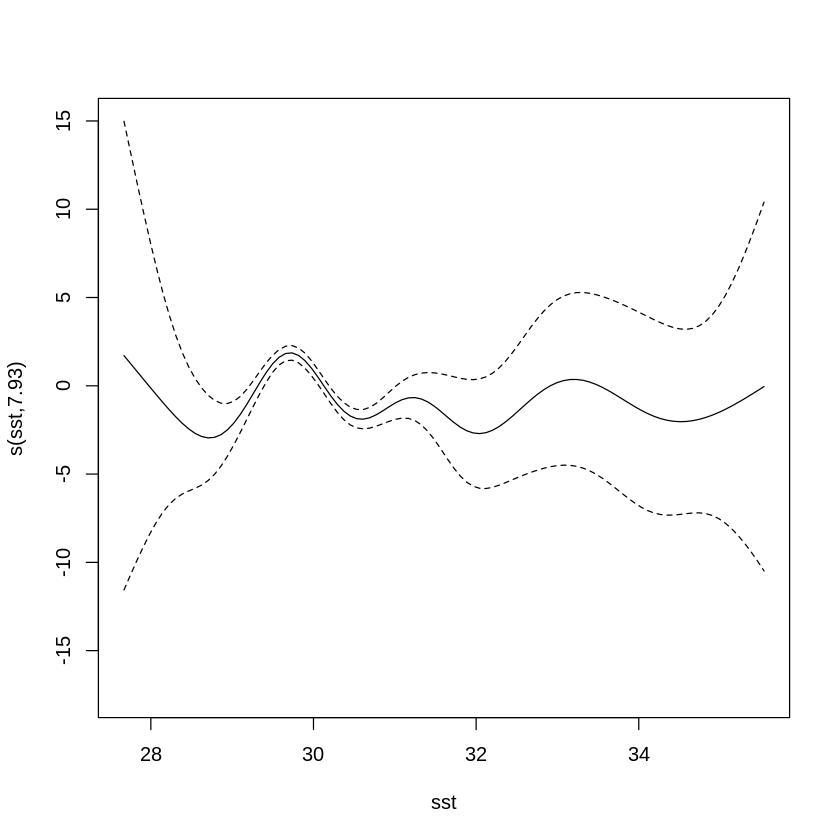

,df,AIC
,<dbl>,<dbl>
my_model1,9.655288,1215703
my_model2,7.398906,1215776
my_model,10.928876,1215702


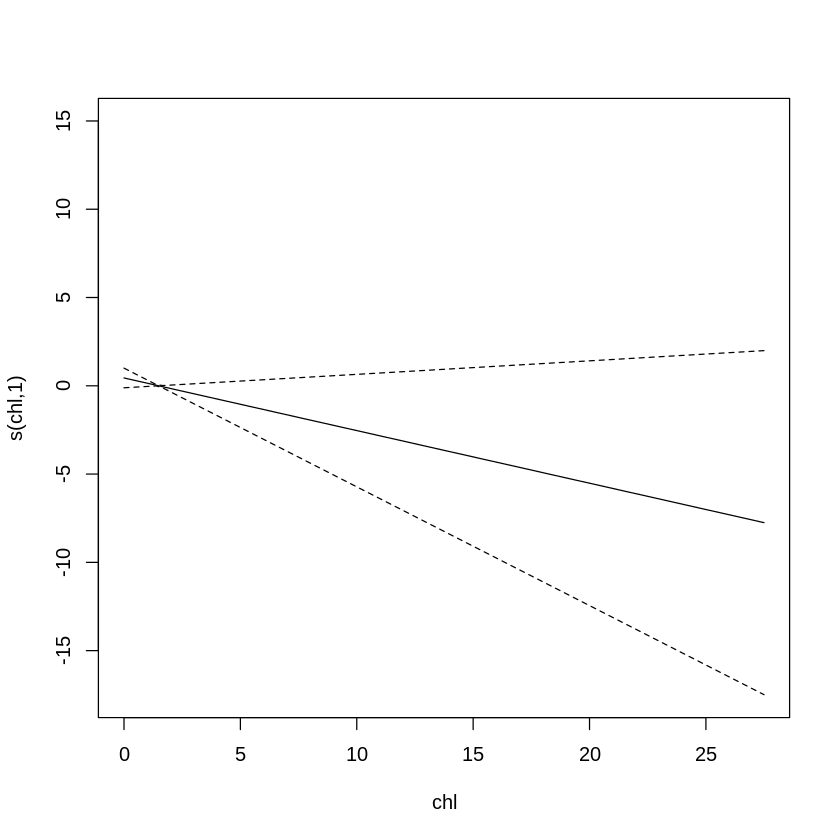

In [ ]:
data <- read.csv2("data_join.csv", header=TRUE)

data$sst <- as.numeric(data$sst)
data$chl <- as.numeric(data$chl)
data$fish <- as.numeric(data$fish)

# class(data$chl)
my_model1 <- gam(fish ~ s(sst) , data = data)
my_model2 <- gam(fish ~ s(chl), data = data)
my_model <- gam(fish ~ s(sst) + s(chl), data = data)
summary(my_model)
plot.gam(my_model)
AIC(my_model1, my_model2, my_model)

In [ ]:
my_data <- data.frame(x = 1:3, y = 4:5)
names(my_data) <- "x"
my_data$y

ERROR: ignored

In [ ]:
df <- data.frame(y = y,
                 x = x)

**Linear Regression**

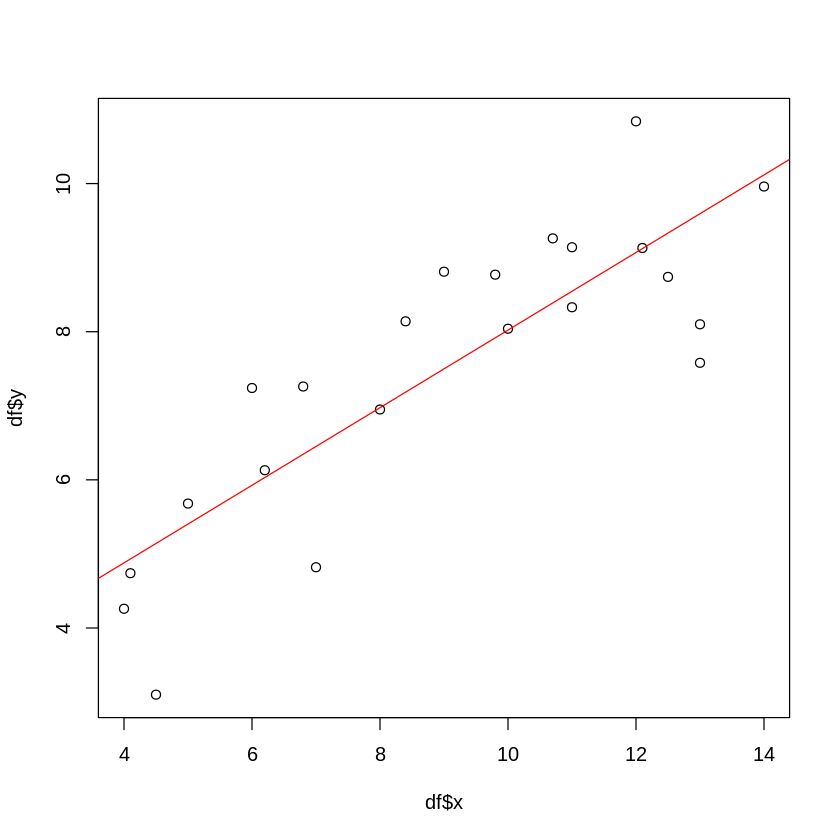

In [ ]:
plot(df$x, df$y)

lmod <- lm(y ~ x, data = df)
abline(lmod, col = "red")

In [ ]:
summary(lmod)


Call:
lm(formula = y ~ x, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0417 -0.4977  0.0128  0.8665  1.7702 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.78483    0.71862   3.875 0.000942 ***
x            0.52374    0.07544   6.943 9.68e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.1 on 20 degrees of freedom
Multiple R-squared:  0.7068,	Adjusted R-squared:  0.6921 
F-statistic:  48.2 on 1 and 20 DF,  p-value: 9.676e-07


**Non Linear Model**

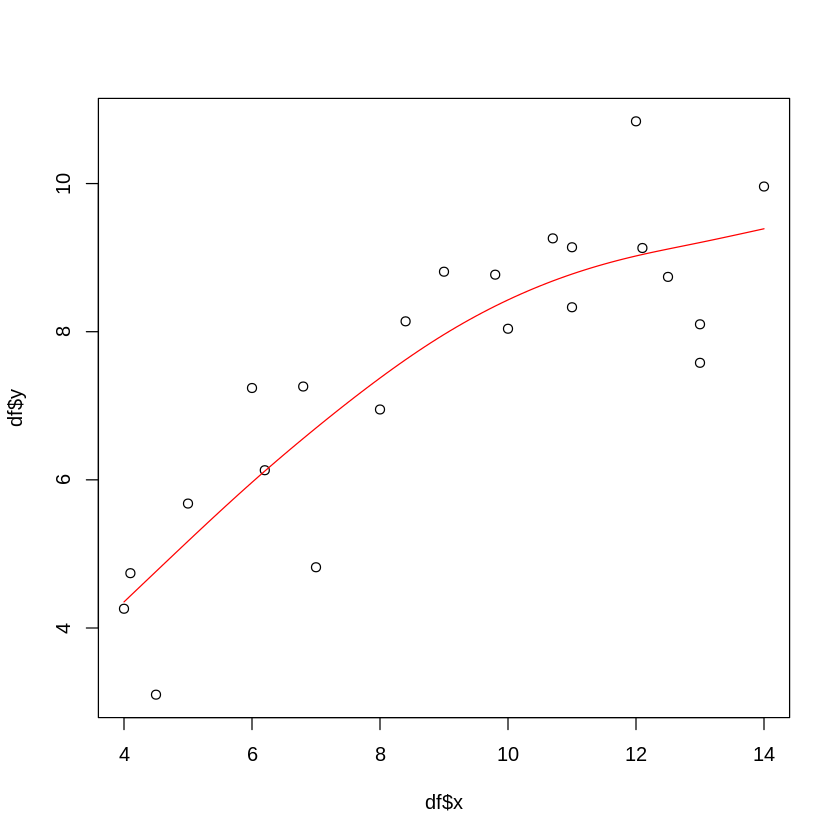

In [ ]:
gammod <- gam(y ~ s(x, fx = FALSE), data = df)

px <- seq(min(df$x), max(df$x), 0.1)
gampred <- predict(gammod, list(x = px))

plot(df$x, df$y)
lines(px, gampred, col = "red")

In [ ]:
summary(gammod)


Family: gaussian 
Link function: identity 

Formula:
y ~ s(x, fx = FALSE)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.5009     0.2109   35.56   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
       edf Ref.df     F p-value    
s(x) 2.031  2.536 25.29  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.751   Deviance explained = 77.5%
GCV = 1.1353  Scale est. = 0.97893   n = 22


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 4 iterations.
The RMS GCV score gradient at convergence was 0.0001316891 .
The Hessian was positive definite.
Model rank =  10 / 10 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

       k'  edf k-index p-value
s(x) 9.00 2.03    0.98    0.34


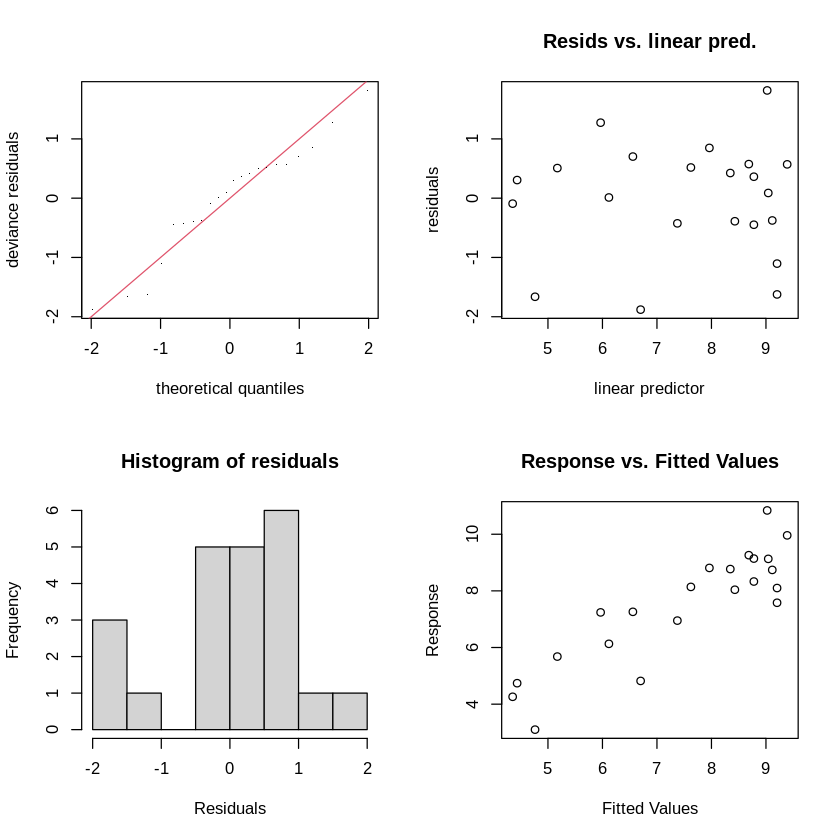

In [ ]:
gam.check(gammod)

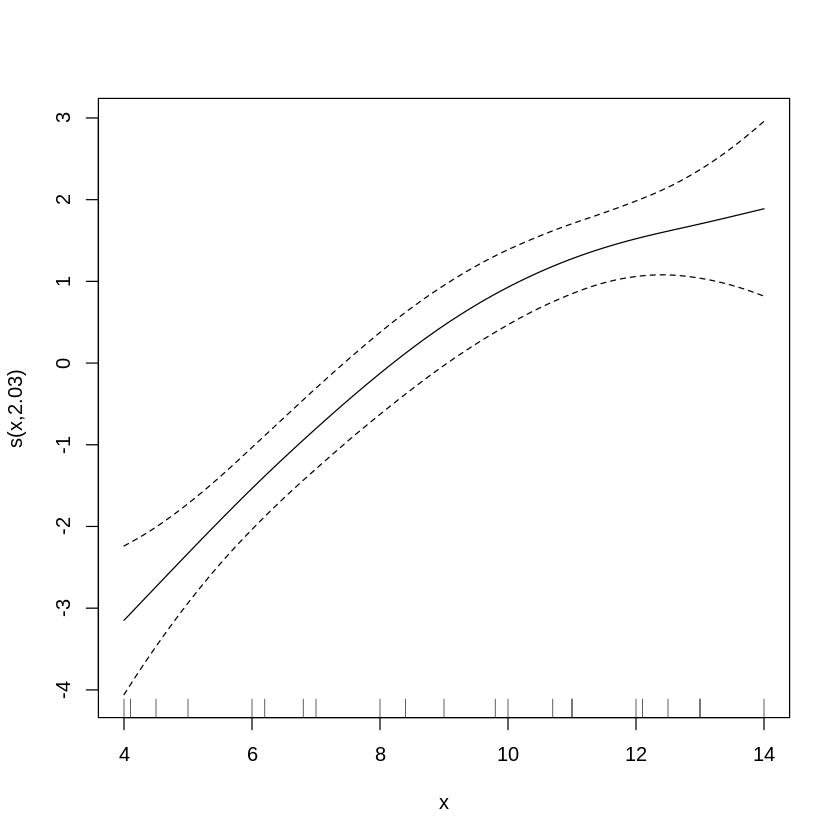

In [ ]:
plot(gammod)

In [ ]:
# Load the data
data(mtcars)

# Fit a GAM to the data
gam.model <- gam(mpg ~ s(wt, bs = "cr"), data = mtcars)

# Calculate AIC and BIC
AIC(gam.model)
BIC(gam.model)

[1] 158.687

[1] 169.8893

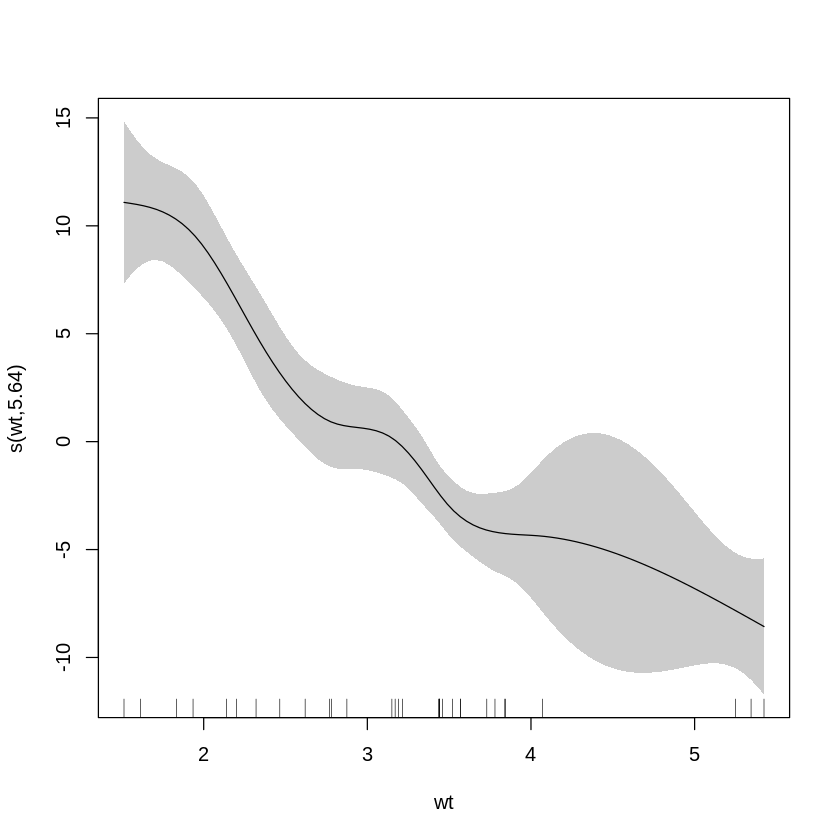

In [ ]:
# Load the data
data(mtcars)

# Fit a GAM to the data with CDE
gam.model <- gam(mpg ~ s(wt, bs = "cr"), data = mtcars, family = c("gaussian"))

# Plot the results
plot(gam.model, se = TRUE, shade = TRUE)